In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix  

Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\rawat\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


In [5]:
df=pd.read_csv(r"C:\Users\rawat\OneDrive\Documents\Downloads\loan_sanction_test.csv")

In [7]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
df_imputed = df.fillna({
    **df.mean(numeric_only=True).to_dict(),
    **df.mode().iloc[0].to_dict()
})
print(df_imputed.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


## UNIVARIATE ANALYSIS 


Plotting numeric variable: LoanAmount


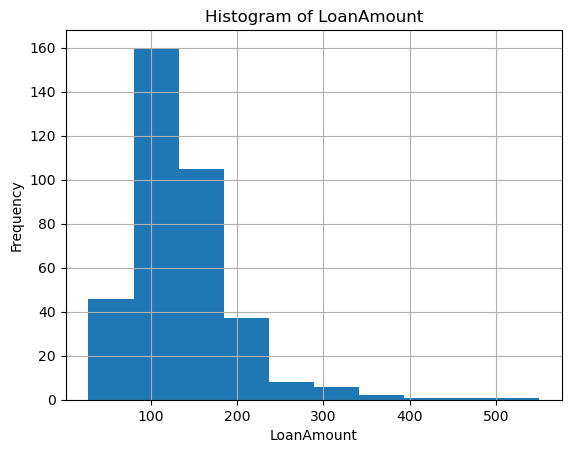


Plotting numeric variable: Loan_Amount_Term


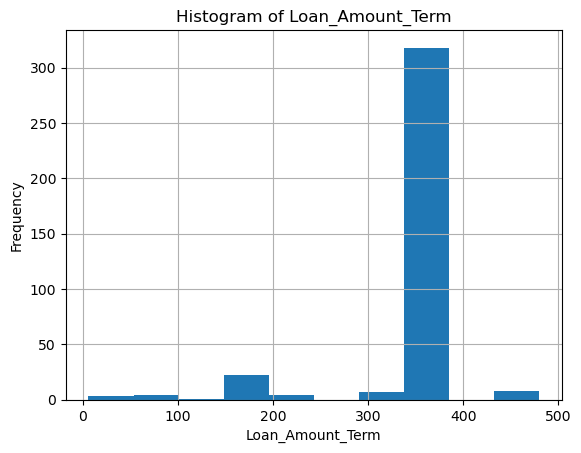


Plotting numeric variable: Credit_History


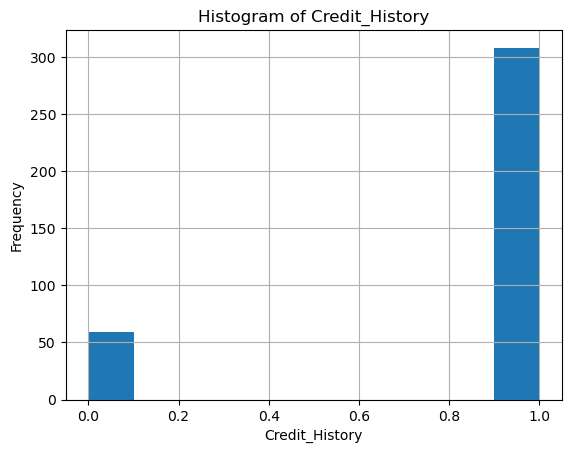

In [13]:
# Histogram
numeric_cols = ['LoanAmount','Loan_Amount_Term','Credit_History']
numeric_present = [c for c in numeric_cols if c in df_imputed.columns]

for col in numeric_present:
    print(f"\nPlotting numeric variable: {col}")

    # Histogram
    plt.figure()
    df_imputed[col].hist()
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Plotting numeric variable: LoanAmount


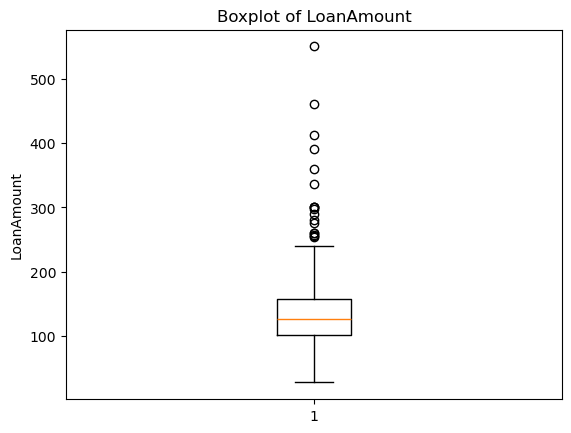


Plotting numeric variable: Loan_Amount_Term


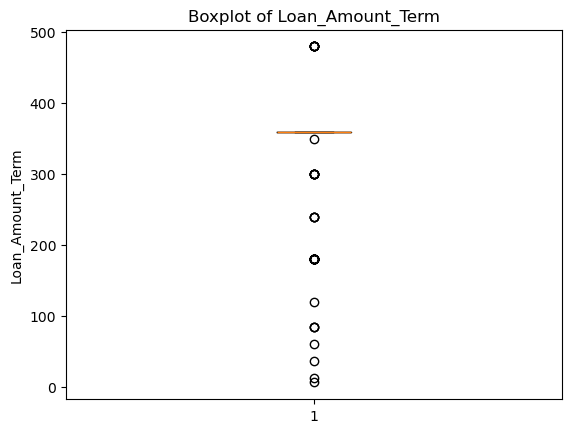


Plotting numeric variable: Credit_History


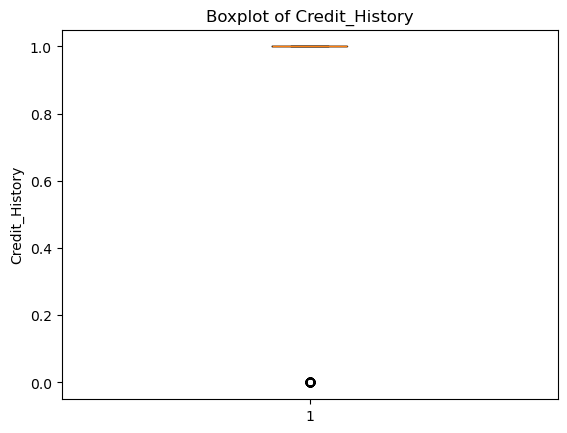

In [14]:
numeric_cols = ['LoanAmount','Loan_Amount_Term','Credit_History']
numeric_present = [c for c in numeric_cols if c in df_imputed.columns]

for col in numeric_present:
    print(f"\nPlotting numeric variable: {col}")
    plt.figure()
    plt.boxplot(df_imputed[col].dropna())
    plt.title('Boxplot of ' + col)
    plt.ylabel(col)
    plt.show()


Plotting bar chart for: Gender

Plotting bar chart for: Married

Plotting bar chart for: Dependents

Plotting bar chart for: Education

Plotting bar chart for: Self_Employed

Plotting bar chart for: Property_Area


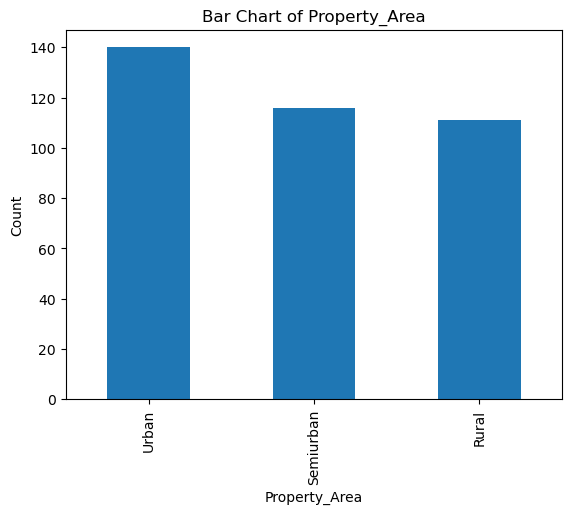

In [15]:
# CATEGORICAL: BAR CHART
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
cat_present = [c for c in cat_cols if c in df_imputed.columns]

for col in cat_present:
    print(f"\nPlotting bar chart for: {col}")

plt.figure()
df_imputed[col].value_counts().plot(kind='bar')
plt.title('Bar Chart of ' + col)
plt.xlabel(col)
plt.ylabel('Count')
plt.show()


Plotting Pie Chart for: Gender


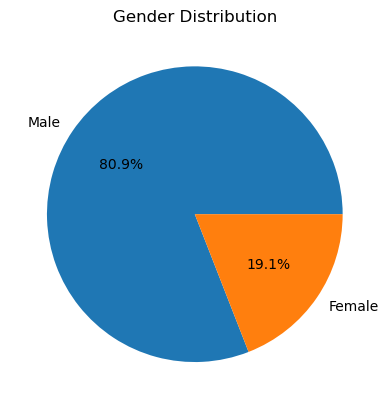

In [16]:
# CATEGORICAL: PIE CHART

pie_column = 'Loan_Status' if 'Loan_Status' in df_imputed.columns else 'Gender'

print(f"\nPlotting Pie Chart for: {pie_column}")

plt.figure()
df_imputed[pie_column].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title(pie_column + ' Distribution')
plt.ylabel('')
plt.show()

## Bivariate Analysis

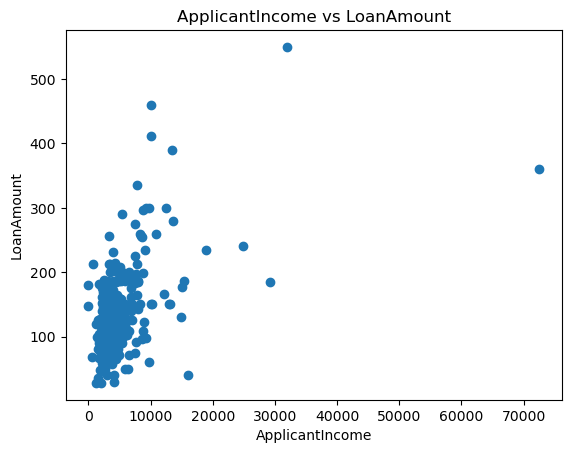

In [17]:
if 'ApplicantIncome' in df_imputed.columns and 'LoanAmount' in df_imputed.columns:
    plt.figure()
    plt.scatter(df_imputed['ApplicantIncome'], df_imputed['LoanAmount'])
    plt.title('ApplicantIncome vs LoanAmount')
    plt.xlabel('ApplicantIncome')
    plt.ylabel('LoanAmount')
    plt.show()

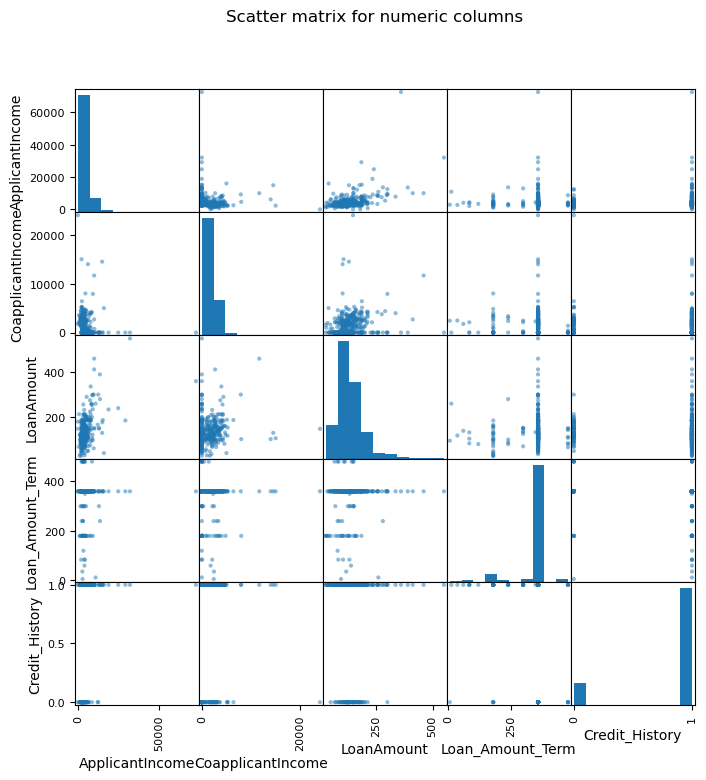

In [18]:
num_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 6:
    num_cols = num_cols[:6]
if len(num_cols) >= 2:
    scatter_matrix(df_imputed[num_cols].dropna(), figsize=(8,8))
    plt.suptitle('Scatter matrix for numeric columns')
    plt.show()

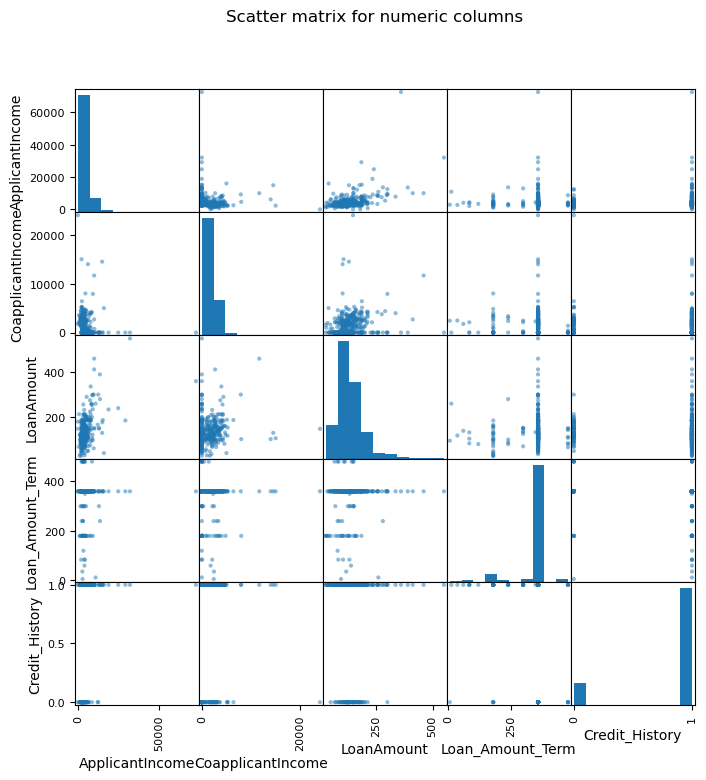

In [19]:
num_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 6:
    num_cols = num_cols[:6]
if len(num_cols) >= 2:
    scatter_matrix(df_imputed[num_cols].dropna(), figsize=(8,8))
    plt.suptitle('Scatter matrix for numeric columns')
    plt.show()

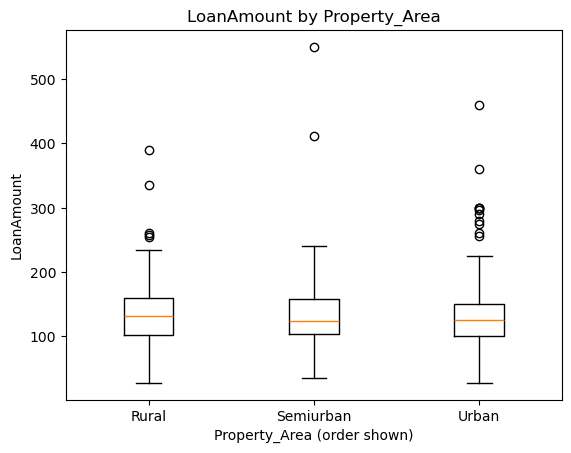

In [20]:
if 'LoanAmount' in df_imputed.columns and 'Property_Area' in df_imputed.columns:
    groups = df_imputed.groupby('Property_Area')['LoanAmount'].apply(list)
    plt.figure()
    plt.boxplot(groups)
    plt.title('LoanAmount by Property_Area')
    plt.xlabel('Property_Area (order shown)')
    plt.ylabel('LoanAmount')
    plt.xticks(range(1, len(groups.index)+1), groups.index)
    plt.show()
else:
    print("Skipping grouped boxplot: needed columns not present.")

 ## Multivariate Analysis 

Correlation matrix:
                    ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.110335    0.491656   
CoapplicantIncome        -0.110335           1.000000    0.150114   
LoanAmount                0.491656           0.150114    1.000000   
Loan_Amount_Term          0.023319          -0.008633    0.095423   
Credit_History            0.094944          -0.058004   -0.013528   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.023319        0.094944  
CoapplicantIncome         -0.008633       -0.058004  
LoanAmount                 0.095423       -0.013528  
Loan_Amount_Term           1.000000       -0.048189  
Credit_History            -0.048189        1.000000  


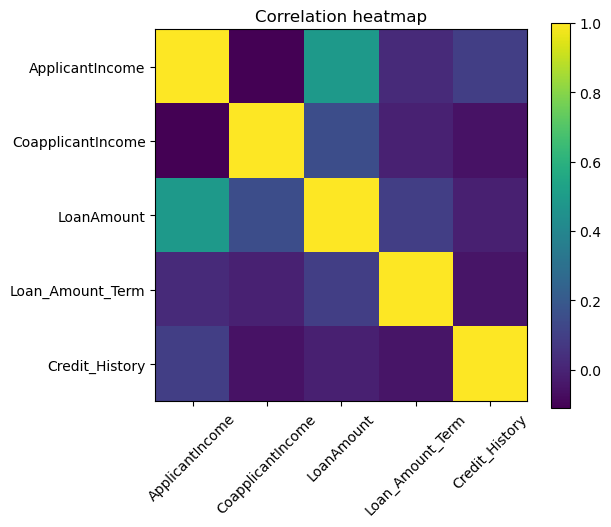

In [21]:
num_df = df_imputed.select_dtypes(include=[np.number])
if num_df.shape[1] >= 2:
    corr = num_df.corr()
    print("Correlation matrix:\n", corr)
    plt.figure(figsize=(6,5))
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title('Correlation heatmap')
    plt.show()
else:
    print("Not enough numeric columns for correlation.")

Crosstab:
 Gender         Female  Male
Property_Area              
Rural              18    93
Semiurban          27    89
Urban              25   115


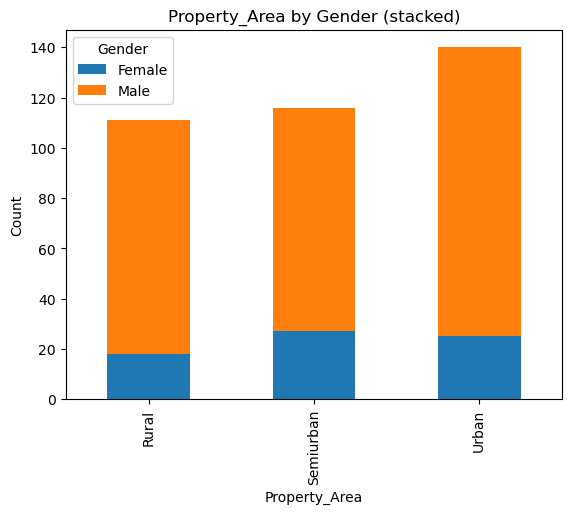

In [22]:
if 'Property_Area' in df_imputed.columns and 'Gender' in df_imputed.columns:
    ct = pd.crosstab(df_imputed['Property_Area'], df_imputed['Gender'])
    print("Crosstab:\n", ct)
    ct.plot(kind='bar', stacked=True)
    plt.title('Property_Area by Gender (stacked)')
    plt.xlabel('Property_Area')
    plt.ylabel('Count')
    plt.show()
else:
    print("Required columns not available.")

In [2]:
## Key Insights
1. Credit history has the strongest impact on loan approval. People with a clean credit record get approved more often.

2. Applicant income helps, but it's not the only factor.

3. Education and marital status show some difference but are not major decision makers.

4. Property area sometimes affects approval, with slightly higher approvals in many of the datasets for urban areas.

5. Loan amount being very high slightly reduces the chances of approval.

SyntaxError: unterminated string literal (detected at line 4) (2976949849.py, line 4)